In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from dython.nominal import associations

## Import Excel files

In [2]:
Spend = pd.read_csv('UW 2022 Spend.csv')
print(Spend.shape)
Spend.head(5)

(8571, 26)


,Location ID,Invoice Number,Account,Asset ID,Location,Address,City,State,Zip Code,Container Type,Container Size,Compactor,Asset Type,Asset Category,Waste Stream,Waste Type,Report Date,Charge Date,Charge Amount,Charge Code Desc.,From Date,To Date,Quantity,Unit of Measure,Charge Group,Charge Sub-Type
0,101,20221200,800-0303937,800-0303937-00001-01,FLOOR & DECOR 101 30YD CLEANUP,1690 NORTHEAST EXPY NE,BROOKHAVEN,GA,30329,RO,30,NaN,TEMPORARY,Industrial,Trash,NONE,12/1/2022,12/31/2022,$77.25,CONTAINER/COMPACTOR RENTAL,1/1/2023,1/31/2023,1.00,EA,MISC,RENT
1,101,20221200,800-0303937,800-0303937-00001-01,FLOOR & DECOR 101 30YD CLEANUP,1690 NORTHEAST EXPY NE,BROOKHAVEN,GA,30329,RO,30,NaN,TEMPORARY,Industrial,Trash,NONE,12/1/2022,12/1/2022,$95.86,DISPOSAL CHARGE,12/1/2022,12/1/2022,1.77,TN,DSP,NaN
2,101,20221200,800-0303937,800-0303937-00001-01,FLOOR & DECOR 101 30YD CLEANUP,1690 NORTHEAST EXPY NE,BROOKHAVEN,GA,30329,RO,30,NaN,TEMPORARY,Industrial,Trash,NONE,12/1/2022,12/6/2022,$77.45,DISPOSAL CHARGE,12/6/2022,12/6/2022,1.43,TN,DSP,NaN
3,101,20221200,800-0303937,800-0303937-00001-01,FLOOR & DECOR 101 30YD CLEANUP,1690 NORTHEAST EXPY NE,BROOKHAVEN,GA,30329,RO,30,NaN,TEMPORARY,Industrial,Trash,NONE,12/1/2022,12/8/2022,$92.07,DISPOSAL CHARGE,12/8/2022,12/8/2022,1.70,TN,DSP,NaN
4,101,20221200,800-0303937,800-0303937-00001-01,FLOOR & DECOR 101 30YD CLEANUP,1690 NORTHEAST EXPY NE,BROOKHAVEN,GA,30329,RO,30,NaN,TEMPORARY,Industrial,Trash,NONE,12/1/2022,12/12/2022,$89.91,DISPOSAL CHARGE,12/12/2022,12/12/2022,1.66,TN,DSP,NaN


In [3]:
Tonnages = pd.read_csv('UW Tonnages 2022 v2.csv')
print(Tonnages.shape)
Tonnages.head(5)

(1043, 22)


,Location ID,Asset ID,Location,Address,City,State,Zip Code,Container Type,Container Size,Compactor,Asset Type,Asset Category,Waste Stream,Waste Type,Report Period,Service Period,Original Volume,UOM for Volume,Pounds per Yard,Trash Tons,Recycle Tons,Tons Derived
0,119,859-8001762-00001-01,FLOOR & DECOR 119 40YD COMP,125 NW LOOP 410,SAN ANTONIO,TX,78216,RO,40,C,PERMANENT,Industrial,Trash,NONE,Dec-22,Dec-22,19.21,TN,300,19.21,0.0,N
1,119,859-8001762-00001-01,FLOOR & DECOR 119 40YD COMP,125 NW LOOP 410,SAN ANTONIO,TX,78216,RO,40,C,PERMANENT,Industrial,Trash,NONE,Nov-22,Nov-22,16.65,TN,300,16.65,0.0,N
2,119,859-8001762-00001-01,FLOOR & DECOR 119 40YD COMP,125 NW LOOP 410,SAN ANTONIO,TX,78216,RO,40,C,PERMANENT,Industrial,Trash,NONE,Oct-22,Oct-22,15.44,TN,300,15.44,0.0,N
3,119,859-8001762-00001-01,FLOOR & DECOR 119 40YD COMP,125 NW LOOP 410,SAN ANTONIO,TX,78216,RO,40,C,PERMANENT,Industrial,Trash,NONE,Sep-22,Sep-22,28.25,TN,300,28.25,0.0,N
4,119,859-8001762-00001-01,FLOOR & DECOR 119 40YD COMP,125 NW LOOP 410,SAN ANTONIO,TX,78216,RO,40,C,PERMANENT,Industrial,Trash,NONE,Aug-22,Aug-22,31.96,TN,300,31.96,0.0,N


## Data Type

In [4]:
Spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8571 entries, 0 to 8570
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location ID        8571 non-null   object 
 1   Invoice Number     8571 non-null   int64  
 2   Account            8571 non-null   object 
 3   Asset ID           8571 non-null   object 
 4   Location           8571 non-null   object 
 5   Address            8571 non-null   object 
 6   City               8571 non-null   object 
 7   State              8571 non-null   object 
 8   Zip Code           8571 non-null   int64  
 9   Container Type     8571 non-null   object 
 10  Container Size     8571 non-null   int64  
 11  Compactor          4143 non-null   object 
 12  Asset Type         8571 non-null   object 
 13  Asset Category     8571 non-null   object 
 14  Waste Stream       8571 non-null   object 
 15  Waste Type         8571 non-null   object 
 16  Report Date        8571 

In [5]:
Tonnages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location ID      1043 non-null   object 
 1   Asset ID         1043 non-null   object 
 2   Location         1043 non-null   object 
 3   Address          1043 non-null   object 
 4   City             1043 non-null   object 
 5   State            1043 non-null   object 
 6   Zip Code         1043 non-null   int64  
 7   Container Type   1043 non-null   object 
 8   Container Size   1043 non-null   int64  
 9   Compactor        288 non-null    object 
 10  Asset Type       1043 non-null   object 
 11  Asset Category   1043 non-null   object 
 12  Waste Stream     1043 non-null   object 
 13  Waste Type       1043 non-null   object 
 14  Report Period    1043 non-null   object 
 15  Service Period   1043 non-null   object 
 16  Original Volume  1043 non-null   float64
 17  UOM for Volume

## Checking for missing values

In [6]:
Spend.isnull().sum()

Location ID             0
Invoice Number          0
Account                 0
Asset ID                0
Location                0
Address                 0
City                    0
State                   0
Zip Code                0
Container Type          0
Container Size          0
Compactor            4428
Asset Type              0
Asset Category          0
Waste Stream            0
Waste Type              0
Report Date             0
Charge Date             0
Charge Amount           0
Charge Code Desc.       0
From Date               0
To Date                 0
Quantity                0
Unit of Measure         0
Charge Group            0
Charge Sub-Type      5430
dtype: int64

In [7]:
Tonnages.isnull().sum()

Location ID          0
Asset ID             0
Location             0
Address              0
City                 0
State                0
Zip Code             0
Container Type       0
Container Size       0
Compactor          755
Asset Type           0
Asset Category       0
Waste Stream         0
Waste Type           0
Report Period        0
Service Period       0
Original Volume      0
UOM for Volume       0
Pounds per Yard      0
Trash Tons           0
Recycle Tons         0
Tons Derived         0
dtype: int64

## SUMMARY STATISTICS

In [8]:
print(Spend.describe(include='all').transpose())

                    count unique                          top  freq  \
Location ID          8571     31                          110   718   
Invoice Number     8571.0    NaN                          NaN   NaN   
Account              8571    199                  625-8109512   466   
Asset ID             8571    209         625-8109512-00001-01   466   
Location             8571    186  FLOOR & DECOR 108 40YD COMP   466   
Address              8571     42          3113 E COLONIAL DR    718   
City                 8571     33                      ORLANDO   705   
State                8571     11                           FL  2900   
Zip Code           8571.0    NaN                          NaN   NaN   
Container Type       8571      6                           RO  8138   
Container Size     8571.0    NaN                          NaN   NaN   
Compactor            4143      1                            C  4143   
Asset Type           8571      2                    PERMANENT  5066   
Asset 

In [9]:
print(Tonnages.describe(include='all').transpose())

                  count unique                         top freq          mean  \
Location ID        1043     32                         124   56           NaN   
Asset ID           1043    202        842-8001319-00001-01   13           NaN   
Location           1043    185  FLOOR & DECOR 124 40YD C&D   30           NaN   
Address            1043     42  4 WESTSIDE SHOPPING CENTER   56           NaN   
City               1043     32                     HOUSTON  115           NaN   
State              1043     10                          TX  334           NaN   
Zip Code         1043.0    NaN                         NaN  NaN  59889.105465   
Container Type     1043      7                          RO  601           NaN   
Container Size   1043.0    NaN                         NaN  NaN     22.197507   
Compactor           288      1                           C  288           NaN   
Asset Type         1043      2                   PERMANENT  682           NaN   
Asset Category     1043     

## Correlation & Associations

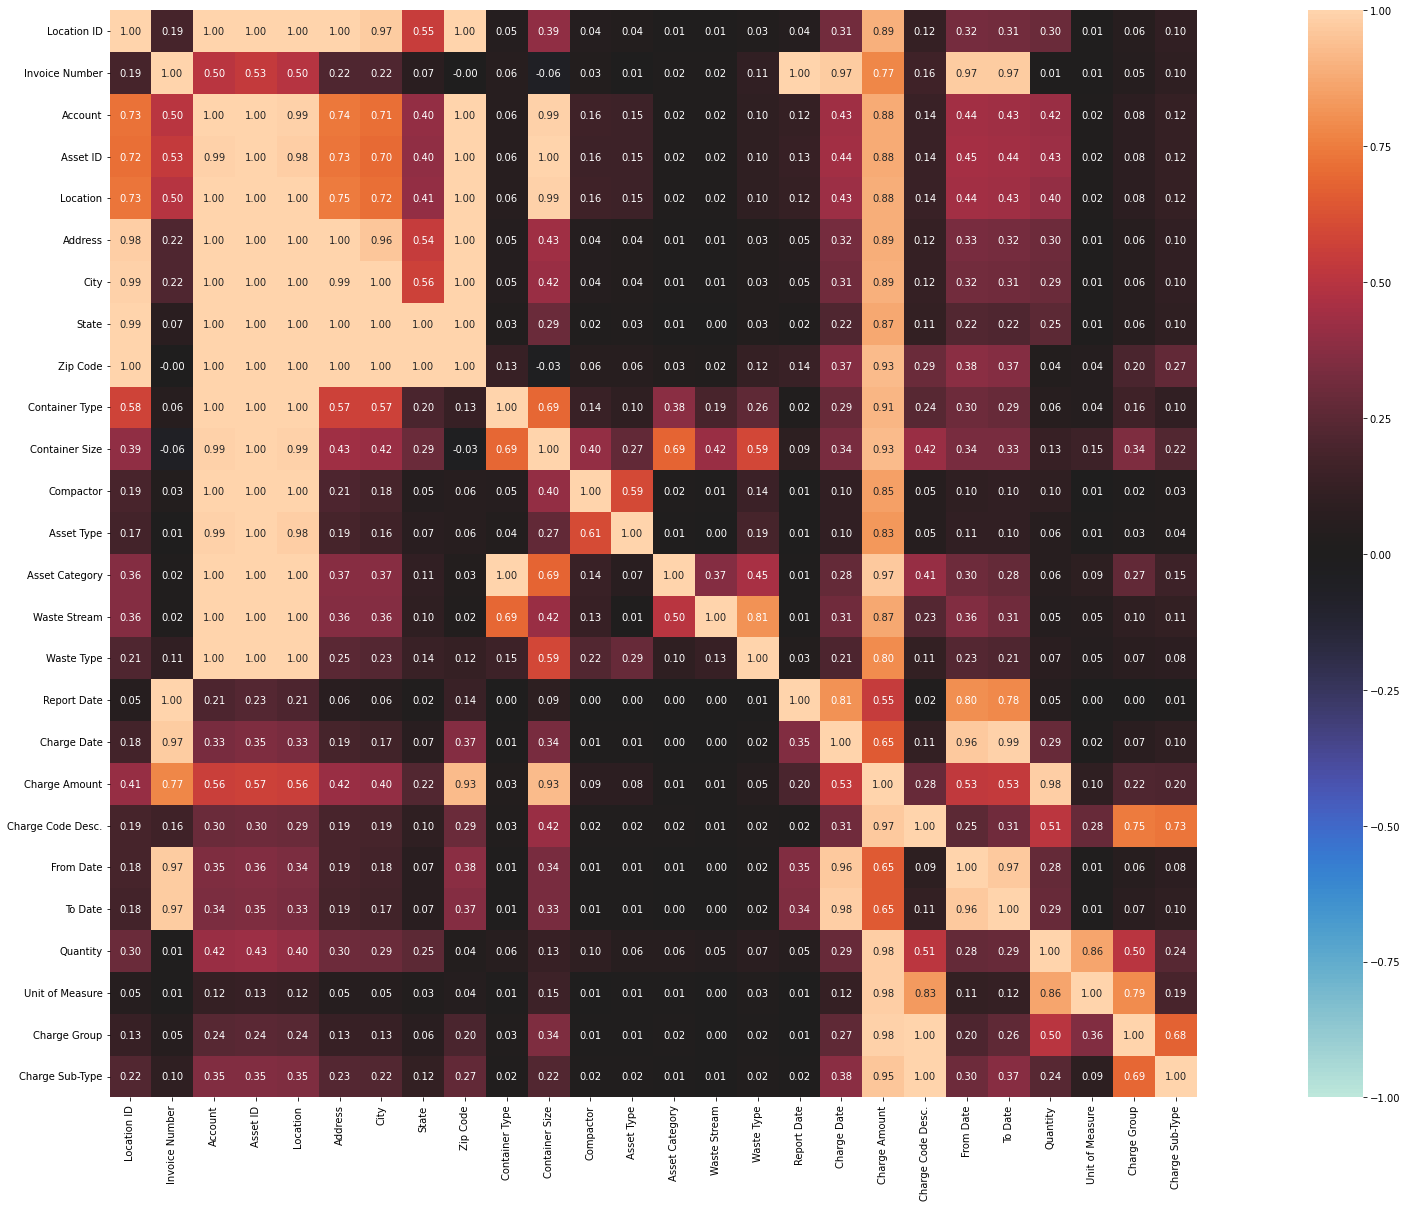

{'corr':                    Location ID  Invoice Number   Account  Asset ID  Location  \
 Location ID           1.000000        0.187494  1.000000  1.000000  0.999780   
 Invoice Number        0.187494        1.000000  0.502989  0.533797  0.496049   
 Account               0.726053        0.502989  1.000000  1.000000  0.992116   
 Asset ID              0.715330        0.533797  0.985231  1.000000  0.977464   
 Location              0.731661        0.496049  1.000000  1.000000  1.000000   
 Address               0.978213        0.217077  1.000000  1.000000  0.999784   
 City                  0.989404        0.216076  1.000000  1.000000  0.999776   
 State                 0.993503        0.074895  1.000000  1.000000  0.999821   
 Zip Code              0.999074       -0.003000  1.000000  1.000000  0.999999   
 Container Type        0.577012        0.056989  1.000000  1.000000  0.995504   
 Container Size        0.392012       -0.059814  0.987467  1.000000  0.985664   
 Compactor          

In [16]:
associations(Spend, nom_nom_assoc='theil', figsize=(40, 20), cmap=None, cbar=True)

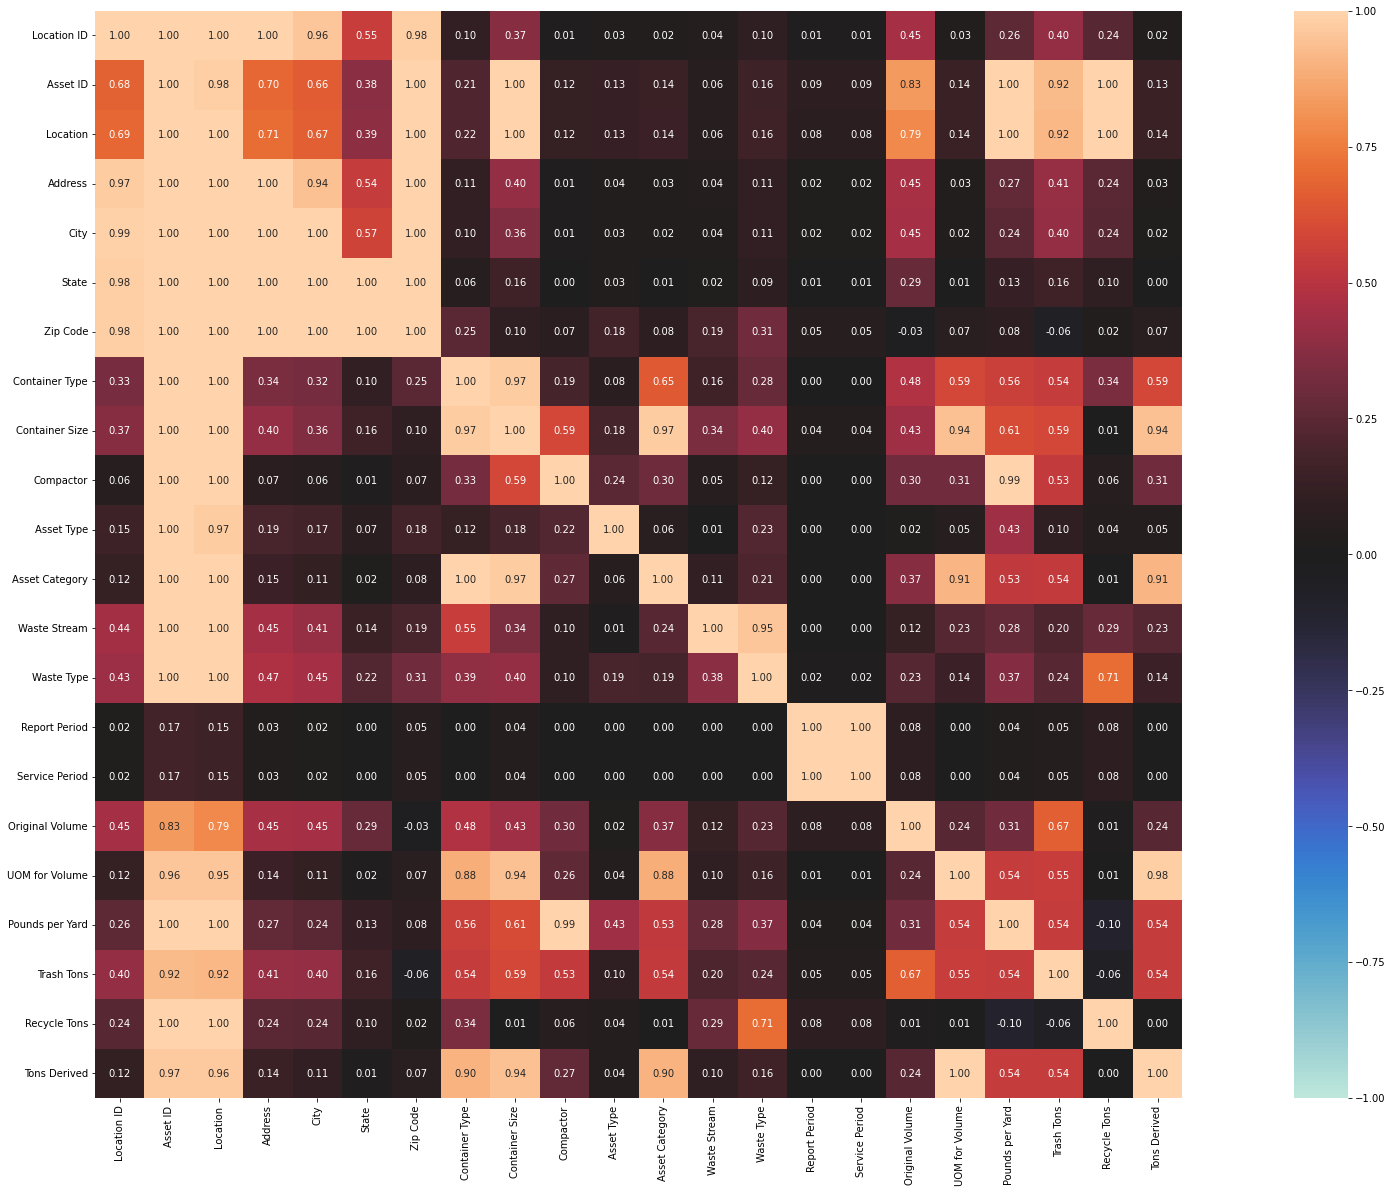

{'corr':                  Location ID  Asset ID  Location   Address      City  \
 Location ID         1.000000  1.000000  0.999196  0.997589  0.957002   
 Asset ID            0.678714  1.000000  0.982123  0.695134  0.658941   
 Location            0.690513  1.000000  1.000000  0.707232  0.670380   
 Address             0.974023  1.000000  0.999215  1.000000  0.944263   
 City                0.985718  1.000000  0.999172  0.996128  1.000000   
 State               0.983213  1.000000  1.000000  0.997452  1.000000   
 Zip Code            0.984130  1.000000  1.000000  1.000000  1.000000   
 Container Type      0.329619  1.000000  1.000000  0.343424  0.321341   
 Container Size      0.368944  1.000000  0.999372  0.402778  0.359262   
 Compactor           0.059156  1.000000  1.000000  0.071039  0.058865   
 Asset Type          0.153144  1.000000  0.971352  0.191971  0.166727   
 Asset Category      0.121722  1.000000  1.000000  0.147771  0.113814   
 Waste Stream        0.442429  1.000000  1.

In [17]:
associations(Tonnages, nom_nom_assoc='theil', figsize=(40, 20), cmap=None, cbar=True)

## Merge the 2 Datasests

In [6]:
Merged_Data = Spend.merge(Tonnages[['Asset ID','Report Period','Service Period','Original Volume','UOM for Volume','Pounds per Yard','Trash Tons','Recycle Tons','Tons Derived']], 
                          how='left', on='Asset ID')
print(Merged_Data.shape)
Merged_Data.head(5)

(75670, 34)


,Location ID,Invoice Number,Account,Asset ID,Location,Address,City,State,Zip Code,Container Type,Container Size,Compactor,Asset Type,Asset Category,Waste Stream,Waste Type,Report Date,Charge Date,Charge Amount,Charge Code Desc.,From Date,To Date,Quantity,Unit of Measure,Charge Group,Charge Sub-Type,Report Period,Service Period,Original Volume,UOM for Volume,Pounds per Yard,Trash Tons,Recycle Tons,Tons Derived
0,101,20221200,800-0303937,800-0303937-00001-01,FLOOR & DECOR 101 30YD CLEANUP,1690 NORTHEAST EXPY NE,BROOKHAVEN,GA,30329,RO,30,NaN,TEMPORARY,Industrial,Trash,NONE,12/1/2022,12/31/2022,$77.25,CONTAINER/COMPACTOR RENTAL,1/1/2023,1/31/2023,1.0,EA,MISC,RENT,Dec-22,Dec-22,17.16,TN,100.0,17.16,0.0,N
1,101,20221200,800-0303937,800-0303937-00001-01,FLOOR & DECOR 101 30YD CLEANUP,1690 NORTHEAST EXPY NE,BROOKHAVEN,GA,30329,RO,30,NaN,TEMPORARY,Industrial,Trash,NONE,12/1/2022,12/31/2022,$77.25,CONTAINER/COMPACTOR RENTAL,1/1/2023,1/31/2023,1.0,EA,MISC,RENT,Nov-22,Nov-22,15.67,TN,100.0,15.67,0.0,N
2,101,20221200,800-0303937,800-0303937-00001-01,FLOOR & DECOR 101 30YD CLEANUP,1690 NORTHEAST EXPY NE,BROOKHAVEN,GA,30329,RO,30,NaN,TEMPORARY,Industrial,Trash,NONE,12/1/2022,12/31/2022,$77.25,CONTAINER/COMPACTOR RENTAL,1/1/2023,1/31/2023,1.0,EA,MISC,RENT,Oct-22,Oct-22,20.21,TN,100.0,20.21,0.0,N
3,101,20221200,800-0303937,800-0303937-00001-01,FLOOR & DECOR 101 30YD CLEANUP,1690 NORTHEAST EXPY NE,BROOKHAVEN,GA,30329,RO,30,NaN,TEMPORARY,Industrial,Trash,NONE,12/1/2022,12/31/2022,$77.25,CONTAINER/COMPACTOR RENTAL,1/1/2023,1/31/2023,1.0,EA,MISC,RENT,Sep-22,Sep-22,14.61,TN,100.0,14.61,0.0,N
4,101,20221200,800-0303937,800-0303937-00001-01,FLOOR & DECOR 101 30YD CLEANUP,1690 NORTHEAST EXPY NE,BROOKHAVEN,GA,30329,RO,30,NaN,TEMPORARY,Industrial,Trash,NONE,12/1/2022,12/31/2022,$77.25,CONTAINER/COMPACTOR RENTAL,1/1/2023,1/31/2023,1.0,EA,MISC,RENT,Aug-22,Aug-22,13.16,TN,100.0,13.16,0.0,N


In [13]:
print(Merged_Data.describe(include='all').transpose())

                     count unique                     top   freq  \
Location ID          75670     31                     110   7573   
Invoice Number     75670.0    NaN                     NaN    NaN   
Account              75670    199             690-8001477   5472   
Asset ID             75670    209    690-8001477-00001-02   5472   
Location             75670    186  FLOOR & DECOR 110 40YD   5472   
Address              75670     42     3113 E COLONIAL DR    7573   
City                 75670     33                 ORLANDO   7560   
State                75670     11                      FL  26532   
Zip Code           75670.0    NaN                     NaN    NaN   
Container Type       75670      6                      RO  71986   
Container Size     75670.0    NaN                     NaN    NaN   
Compactor            46509      1                       C  46509   
Asset Type           75670      2               PERMANENT  56614   
Asset Category       75670      2              I

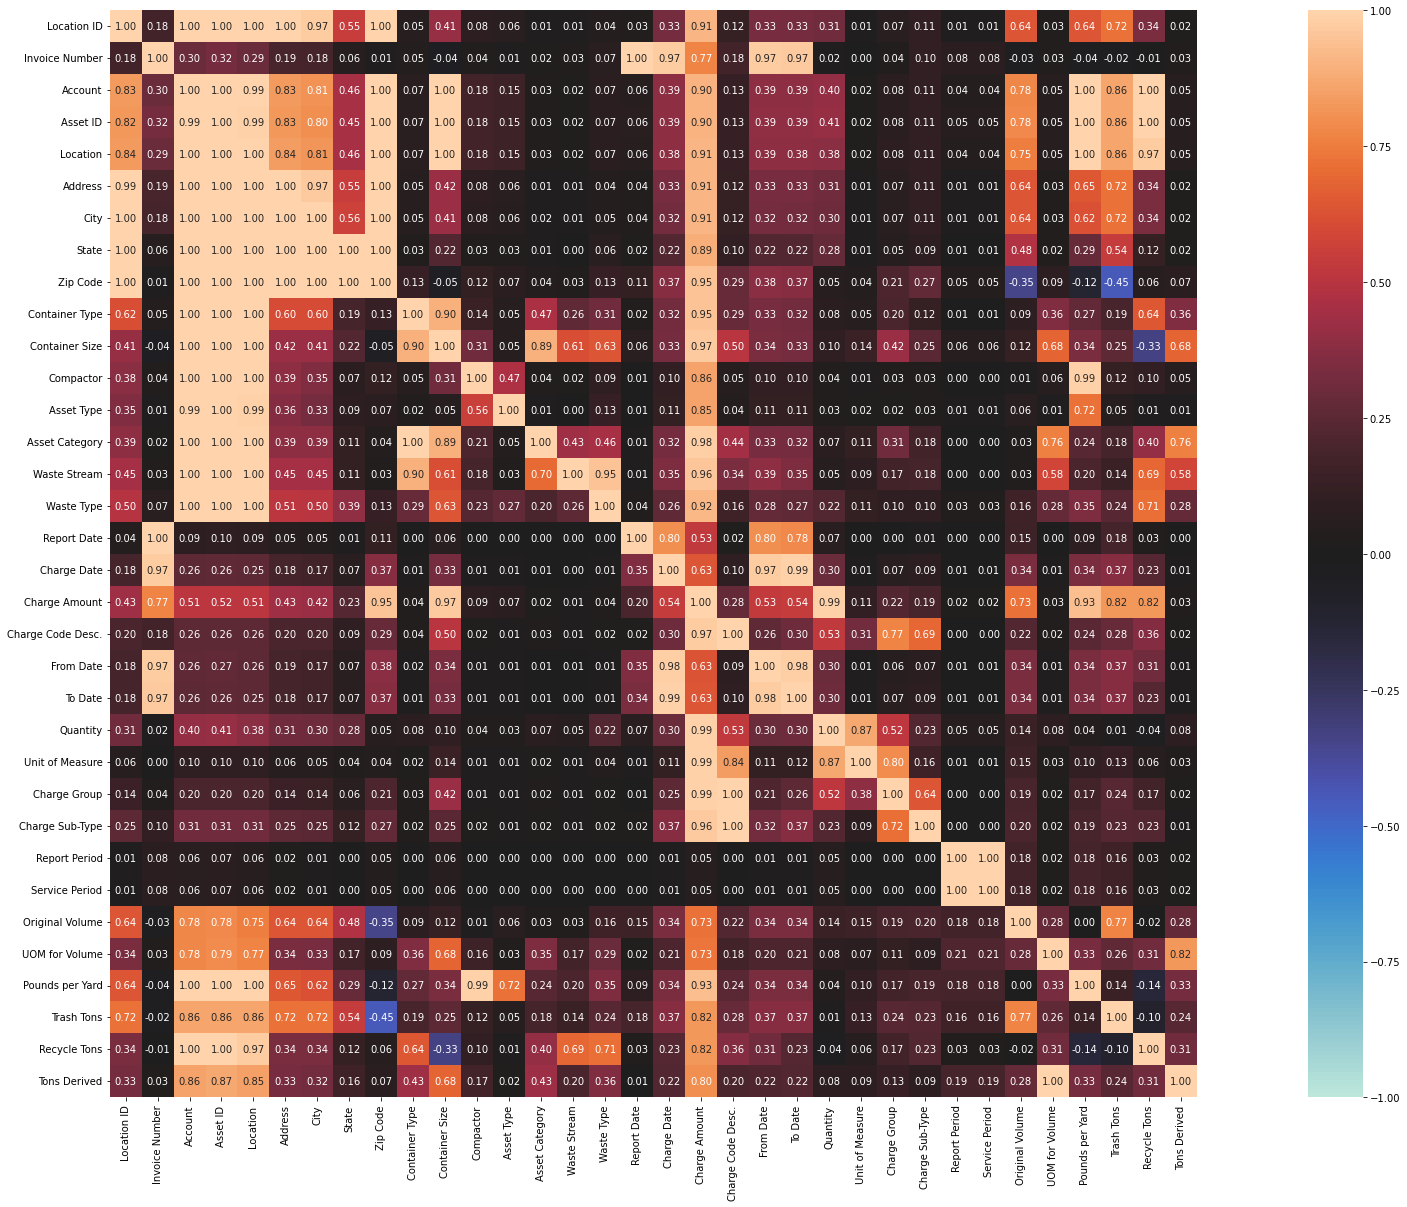

{'corr':                    Location ID  Invoice Number   Account  Asset ID  Location  \
 Location ID           1.000000        0.176091  1.000000  1.000000  0.999960   
 Invoice Number        0.176091        1.000000  0.296310  0.322428  0.294474   
 Account               0.829329        0.296310  1.000000  1.000000  0.992758   
 Asset ID              0.822954        0.322428  0.992313  1.000000  0.985126   
 Location              0.835345        0.294474  1.000000  1.000000  1.000000   
 Address               0.993091        0.189153  1.000000  1.000000  0.999960   
 City                  0.997369        0.182519  1.000000  1.000000  0.999959   
 State                 0.998902        0.055187  1.000000  1.000000  0.999968   
 Zip Code              0.999891        0.010425  1.000000  1.000000  1.000000   
 Container Type        0.615023        0.046610  1.000000  1.000000  0.999411   
 Container Size        0.412076       -0.039500  0.995919  1.000000  0.995508   
 Compactor          

In [18]:
associations(Merged_Data, nom_nom_assoc='theil', figsize=(40, 20), cmap=None, cbar=True)

In [4]:
from ydata_profiling import ProfileReport

In [8]:
profile = ProfileReport(Merged_Data, title="Merged_Data Profiling Report", explorative=True)
profile.to_file("Merged_Data.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile = ProfileReport(Merged_Data, title="Merged_Data Profiling Report", explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]